# Lead Score - Capstone Project

<b><font color = green>Problem Statement</font></b><br>

<p align="justify">X Education is an education company that offers online courses for industry professionals. The company attracts many visitors to its website through various marketing channels. The company faces a problem: its lead conversion rate is very low. Out of 100 leads, only 30 become customers on average.</p>

<p align="justify">To solve this problem, X Education wants to identify the most potential leads, also known as ‘Hot Leads’. The company has hired you to help them with this task. Your job is to build a model that can assign a lead score to each lead based on various factors, such as their demographics, behavior, preferences, etc. The higher the lead score, the more likely the lead is to convert. The lower the lead score, the less likely the lead is to convert. The company’s CEO has set a target of achieving an 80% lead conversion rate with this model.</p>

<b><font color = green>Goals and Objective</font></b><br>
- <p align="justify">Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.</p>
- <p align="justify">There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.</p>

In [136]:
# Importing the necessary packages

import numpy as np
import pandas as pd

In [137]:
# Read the dataset

leads = pd.read_csv('Leads.csv')

In [138]:
# Checking at the first five entries

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [139]:
# Checking the shape of the datsset

leads.shape

(9240, 37)

In [141]:
# Summary of the dataset

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [142]:
# Info

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Seems like we’ve got quite a few categorical columns here, so we’ll need to make dummy variables for them. Also spotting a bunch of missing values, so we’ll clean those up too.

## Step 1: Data Cleaning and Preparation

In [143]:
# Checking the number of missing values in each column

leads.isnull().sum()

,0
Prospect ID,0
Lead Number,0
Lead Origin,0
Lead Source,36
Do Not Email,0
Do Not Call,0
Converted,0
TotalVisits,137
Total Time Spent on Website,0
Page Views Per Visit,137


As you can see there are a lot of columnw which have high number of missing values. Clearly, these columns are not useful. Since, there are 9000 datapoints in our dataframe, let's eliminate the columns having greater than 3000 missing values as they are of no use to us.

In [144]:
# Dropping any columns that have more than 3000 missing values — no point keeping them.

for col in leads.columns:
    if leads[col].isnull().sum() > 3000:
        leads.drop(col, axis = 1, inplace=True)

In [145]:
# Check the number of null values again
leads.isnull().sum()

,0
Prospect ID,0
Lead Number,0
Lead Origin,0
Lead Source,36
Do Not Email,0
Do Not Call,0
Converted,0
TotalVisits,137
Total Time Spent on Website,0
Page Views Per Visit,137


The City column doesn’t really add value to our analysis, so let’s just drop it.

In [146]:
leads.drop(['City'], axis = 1, inplace = True)

In [147]:
# Same thing with the Country column — let’s drop it as well.

leads.drop(['Country'], axis = 1, inplace = True)

In [148]:
# Now, let’s see what percentage of data is missing in each column.

round(100*(leads.isnull().sum()/len(leads.index)), 2)

,0
Prospect ID,0.00
Lead Number,0.00
Lead Origin,0.00
Lead Source,0.39
Do Not Email,0.00
Do Not Call,0.00
Converted,0.00
TotalVisits,1.48
Total Time Spent on Website,0.00
Page Views Per Visit,1.48


In [149]:
# Let’s double-check the number of missing values now.

leads.isnull().sum()

,0
Prospect ID,0
Lead Number,0
Lead Origin,0
Lead Source,36
Do Not Email,0
Do Not Call,0
Converted,0
TotalVisits,137
Total Time Spent on Website,0
Page Views Per Visit,137


Some columns have a level called ‘Select’ — that just means the student didn’t pick an option, so it’s basically a missing value. Let’s check how many times ‘Select’ shows up in each column where it’s present.

In [150]:
# Let’s look at the value counts for each column.

for column in leads:
    print(leads[column].astype('category').value_counts())
    print('___________________________________________________')

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
___________________________________________________
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
___________________________________________________
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64


These three columns still have the ‘Select’ level — let’s check them again.

In [151]:
leads['Lead Profile'].astype('category').value_counts()

,count
Lead Profile,
Select,4146
Potential Lead,1613
Other Leads,487
Student of SomeSchool,241
Lateral Student,24
Dual Specialization Student,20


In [152]:
leads['How did you hear about X Education'].value_counts()

,count
How did you hear about X Education,
Select,5043
Online Search,808
Word Of Mouth,348
Student of SomeSchool,310
Other,186
Multiple Sources,152
Advertisements,70
Social Media,67
Email,26


In [153]:
leads['Specialization'].value_counts()

,count
Specialization,
Select,1942
Finance Management,976
Human Resource Management,848
Marketing Management,838
Operations Management,503
Business Administration,403
IT Projects Management,366
Supply Chain Management,349
"Banking, Investment And Insurance",338


The columns Lead Profile and How did you hear about X Education have too many ‘Select’ entries, which aren’t useful for analysis, so we’ll drop them.

In [154]:
leads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

We also saw that some columns have almost the same value for nearly all rows — like Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, and I agree to pay the amount through cheque. Since they’re basically all ‘No’, they won’t add value to our analysis, so we’ll drop them.

In [155]:
leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
            'Update me on Supply Chain Content', 'Get updates on DM Content',
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

The column What matters most to you in choosing a course is almost entirely Better Career Prospects (6528 times), with the other two options showing up just once each. Not really helpful, so we’ll drop it too.

In [156]:
leads['What matters most to you in choosing a course'].value_counts()

,count
What matters most to you in choosing a course,
Better Career Prospects,6528
Flexibility & Convenience,2
Other,1


In [157]:
# Dropping the rows with missing values in What matters most to you in choosing a course.

leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [158]:
# Checking the number of null values again

leads.isnull().sum()

,0
Prospect ID,0
Lead Number,0
Lead Origin,0
Lead Source,36
Do Not Email,0
Converted,0
TotalVisits,137
Total Time Spent on Website,0
Page Views Per Visit,137
Last Activity,103


The column What is your current occupation has quite a few missing values. Normally, we could drop the whole column, but since we’ve already removed a lot of features, it might still be important. So instead, we’ll just drop the rows where this column is null.

In [159]:
leads = leads[~pd.isnull(leads['What is your current occupation'])]

In [160]:
# Checking the number of null values again

leads.isnull().sum()

,0
Prospect ID,0
Lead Number,0
Lead Origin,0
Lead Source,36
Do Not Email,0
Converted,0
TotalVisits,130
Total Time Spent on Website,0
Page Views Per Visit,130
Last Activity,103


Now that only a few null values are left in the dataset, we can just drop the rows containing them.

In [161]:
# Dropping the rows where TotalVisits is missing.

leads = leads[~pd.isnull(leads['TotalVisits'])]

In [162]:
# Checking the null values again

leads.isnull().sum()

,0
Prospect ID,0
Lead Number,0
Lead Origin,0
Lead Source,29
Do Not Email,0
Converted,0
TotalVisits,0
Total Time Spent on Website,0
Page Views Per Visit,0
Last Activity,0


In [163]:
# Dropping the rows with missing values in Lead Source.

leads = leads[~pd.isnull(leads['Lead Source'])]

In [164]:
# Checking the number of null values again

leads.isnull().sum()

,0
Prospect ID,0
Lead Number,0
Lead Origin,0
Lead Source,0
Do Not Email,0
Converted,0
TotalVisits,0
Total Time Spent on Website,0
Page Views Per Visit,0
Last Activity,0


In [165]:
# Dropping the rows where Specialization is missing.

leads = leads[~pd.isnull(leads['Specialization'])]

In [166]:
# Checking the number of null values again

leads.isnull().sum()

,0
Prospect ID,0
Lead Number,0
Lead Origin,0
Lead Source,0
Do Not Email,0
Converted,0
TotalVisits,0
Total Time Spent on Website,0
Page Views Per Visit,0
Last Activity,0


Now there are no missing values left. Let’s check what percentage of rows we’ve kept.

In [167]:
print(len(leads.index))
print(len(leads.index)/9240)

6373
0.6897186147186147


We still have around 69% of the rows which seems good enough.

In [168]:
# Let's look at the dataset again

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


The columns Prospect ID and Lead Number aren’t useful for our analysis, so we’ll drop them.

In [169]:
leads.drop(['Prospect ID', 'Lead Number'], axis = 1, inplace = True)

In [170]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


### Dummy variable creation

Next, we need to handle the categorical variables. First, let’s check which columns are actually categorical.

In [171]:
# Let’s find the columns that are of type object.

temp = leads.loc[:, leads.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [172]:
# Creating dummy variables using the get_dummies function.
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview',
                              'Last Notable Activity']], drop_first=True)

# Adding the dummy variables back to the main dataframe.
leads = pd.concat([leads, dummy], axis=1)

In [173]:
# Creating dummy variables for ‘Specialization’ separately because it includes the ‘Select’ level, which isn’t useful, so we remove that level explicitly.

dummy_spl = pd.get_dummies(leads['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], axis =1)
leads = pd.concat([leads, dummy_spl], axis = 1)

In [174]:
# Drop the original variables after creating their dummy variables.

leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], axis= 1)

In [175]:
# Let’s review the dataset once more.

leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,5.0,674,2.5,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,2.0,1532,2.0,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,1.0,305,1.0,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
4,1,2.0,1428,1.0,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


### Test-Train Split

Next, we’ll split the dataset into training and testing sets.

In [176]:
# Importing the necessary library

from sklearn.model_selection import train_test_split

In [177]:
# Assigning all feature variables to X.

X = leads.drop(['Converted'], axis =1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,5.0,674,2.5,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,1532,2.0,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.0,305,1.0,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,2.0,1428,1.0,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [178]:
# Assign the target variable to y.

y = leads['Converted']

y.head()

,Converted
0,0
1,0
2,1
3,0
4,1


In [179]:
# Splitting the dataset into 70% training and 30% testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling

There are some numeric variables with different scales in the dataset, so let’s scale those variables now.

In [180]:
# Importing MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [181]:
# Scale the three numeric features in the dataset.

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,True,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
218,0.015936,0.082306,0.250,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4171,0.023904,0.034331,0.375,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4037,0.000000,0.000000,0.000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3660,0.000000,0.000000,0.000,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Looking at the correlations

Let’s check the correlations now. Since there are many variables, it’s better to review the correlation table instead of plotting a heatmap.

In [182]:
# Looking at the correlation table

leads.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Converted,1.000000,0.005651,0.313338,-0.063362,-0.117563,0.288666,-0.019269,-0.133600,-0.021207,0.020205,...,-0.005689,-0.024789,0.049520,-0.000862,0.031349,-0.018603,0.006964,-0.005142,0.005785,-0.011762
TotalVisits,0.005651,1.000000,0.202551,0.489039,0.267954,-0.208375,-0.043000,0.075252,-0.042052,0.085306,...,0.025182,0.028630,-0.000493,0.038725,0.008929,0.014223,0.068015,0.015114,0.063383,0.064384
Total Time Spent on Website,0.313338,0.202551,1.000000,0.303870,0.275606,-0.249493,-0.061429,0.114088,-0.060945,0.227496,...,0.025526,0.011056,0.052437,0.043356,0.050860,0.024919,0.018767,0.003203,0.045386,0.037867
Page Views Per Visit,-0.063362,0.489039,0.303870,1.000000,0.458168,-0.340185,-0.065739,0.109785,-0.062896,0.183735,...,0.062421,0.057990,0.017799,0.063772,0.030364,0.026099,0.027465,0.015230,0.052972,0.111284
Lead Origin_Landing Page Submission,-0.117563,0.267954,0.275606,0.458168,1.000000,-0.363764,-0.074917,0.508857,-0.071507,0.067225,...,0.133206,0.089105,0.084975,0.093730,0.095849,0.070983,0.050077,0.039433,0.111610,0.094875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Specialization_Retail Management,-0.018603,0.014223,0.024919,0.026099,0.070983,-0.025339,-0.007261,0.022168,-0.007395,0.021190,...,-0.023773,-0.016437,-0.037930,-0.017920,-0.028459,1.000000,-0.010668,-0.006986,-0.023639,-0.017223
Specialization_Rural and Agribusiness,0.006964,0.068015,0.018767,0.027465,0.050077,-0.018872,-0.006251,0.021596,-0.006366,-0.037642,...,-0.020467,-0.014152,-0.032656,-0.015429,-0.024501,-0.010668,1.000000,-0.006014,-0.020352,-0.014828
Specialization_Services Excellence,-0.005142,0.015114,0.003203,0.015230,0.039433,-0.011155,-0.004093,0.053189,-0.004169,-0.027058,...,-0.013403,-0.009267,-0.021384,-0.010103,-0.016044,-0.006986,-0.006014,1.000000,-0.013327,-0.009710
Specialization_Supply Chain Management,0.005785,0.063383,0.045386,0.052972,0.111610,-0.035065,-0.001963,0.093536,-0.002431,-0.027074,...,-0.045353,-0.031358,-0.072362,-0.034188,-0.054292,-0.023639,-0.020352,-0.013327,1.000000,-0.032857


## Step 2: Model Building

Let’s move on to model building. Since the dataset has many variables that we can’t handle all at once, the best approach is to use RFE to select a smaller, more manageable set of features.

In [183]:
# Importing LogisticRegression and create a LogisticRegression object.

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced', random_state=100)

In [184]:
# Import RFE and use it to select 15 variables.

from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [185]:
# Let’s check which features have been selected by RFE.

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 21),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 54),
 ('Lead Source_Direct Traffic', False, 23),
 ('Lead Source_Facebook', False, 48),
 ('Lead Source_Google', False, 37),
 ('Lead Source_Live Chat', False, 45),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 36),
 ('Lead Source_Pay per Click Ads', False, 42),
 ('Lead Source_Press_Release', False, 53),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 38),
 ('Lead Source_Social Media', False, 58),
 ('Lead Source_WeLearn', False, 43),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 34),
 ('Lead Source_testone', False, 39),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 22),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link C

In [186]:
# Storing all the columns selected by RFE in the variable col.

col = X_train.columns[rfe.support_]

Now that we have all the variables selected by RFE, and since our focus is on the statistical aspects like p-values and VIFs, use these variables to build a logistic regression model with statsmodels.

In [187]:
# Selecting only the columns selected by RFE

X_train = X_train[col]

In [188]:
# Importing statsmodels

import statsmodels.api as sm

In [189]:
def preprocess_and_build_model(leads):
    
    selected_features = X_train.columns[rfe.support_]
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # Adding constant for statsmodels
    X_train_sm = sm.add_constant(X_train_selected.astype(float))

    # Fiting the model
    logm = sm.GLM(y_train.astype(float), X_train_sm, family=sm.families.Binomial())
    result = logm.fit()

In [190]:
def evaluate_model(result, X_train, X_test, y_train, y_test, cutoff=0.5):

    y_train_pred = result.predict(X_train_const)
    y_test_pred = result.predict(X_test_const)

    # Converting probabilities to predictions using cutoff
    y_train_pred_class = (y_train_pred > cutoff).astype(int)
    y_test_pred_class = (y_test_pred > cutoff).astype(int)

    # Metrics calculation
    train_accuracy = metrics.accuracy_score(y_train, y_train_pred_class)
    test_accuracy = metrics.accuracy_score(y_test, y_test_pred_class)

    train_confusion = metrics.confusion_matrix(y_train, y_train_pred_class)
    test_confusion = metrics.confusion_matrix(y_test, y_test_pred_class)

    metrics_dict = {
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'train_confusion': train_confusion,
        'test_confusion': test_confusion,
        'train_auc': metrics.roc_auc_score(y_train, y_train_pred),
        'test_auc': metrics.roc_auc_score(y_test, y_test_pred)
    }

    return metrics_dict

In [191]:
def find_optimal_cutoff(result, X_train, y_train):
    X_train_const = sm.add_constant(X_train)
    y_train_pred = result.predict(X_train_const)

    cutoffs = np.arange(0.1, 0.9, 0.05)
    metrics_dict = {}

    for cutoff in cutoffs:
        y_pred_class = (y_train_pred > cutoff).astype(int)
        accuracy = metrics.accuracy_score(y_train, y_pred_class)
        conf_matrix = metrics.confusion_matrix(y_train, y_pred_class)
        sensitivity = conf_matrix[1,1] / (conf_matrix[1,1] + conf_matrix[1,0])
        specificity = conf_matrix[0,0] / (conf_matrix[0,0] + conf_matrix[0,1])

        metrics_dict[cutoff] = {
            'accuracy': accuracy,
            'sensitivity': sensitivity,
            'specificity': specificity
        }

    return metrics_dict

Several variables have a p-value greater than 0.05, which we’ll need to address. But first, let’s check the VIFs.

In [192]:
# Importing 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [193]:
print(X_train.isnull().sum())  # Checking for NaNs
print(np.any(np.isinf(X_train)))  # Checking for infinite values

TotalVisits                                             0
Total Time Spent on Website                             0
Lead Origin_Lead Add Form                               0
Lead Source_Olark Chat                                  0
Lead Source_Reference                                   0
Lead Source_Welingak Website                            0
Do Not Email_Yes                                        0
Last Activity_Had a Phone Conversation                  0
Last Activity_SMS Sent                                  0
What is your current occupation_Housewife               0
What is your current occupation_Student                 0
What is your current occupation_Unemployed              0
What is your current occupation_Working Professional    0
Last Notable Activity_Had a Phone Conversation          0
Last Notable Activity_Unreachable                       0
dtype: int64
False


In [194]:
# Replacing Inf values with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)

# Handling missing values (drop or impute)
X_train.dropna(inplace=True)  # Or handle imputation if needed

In [195]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')  # Coerce non-numeric to NaN

In [196]:
X_train = X_train.select_dtypes(include=[np.number])  # Only numeric columns

In [197]:
# Step 6: Now, let's recalculate VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)

print(vif)

                      Features   VIF
0                  TotalVisits  1.32
1  Total Time Spent on Website  1.32


In [198]:
# Let's refit the model with new features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4458
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2866.2
Date:                Tue, 04 Feb 2025   Deviance:                       5732.4
Time:                        10:54:17   Pearson chi2:                 4.06e+04
No. Iterations:                     4   Pseudo R-squ. (CS):            0.09513
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.5747      0.049    -11.779      0.000      -0.670      -0.479
TotalVisits                    -9.9814      2.347     -4.253      0.000     -14.581      -5.382
Total Time Spent on Website     2.7957      0.142     19.732      0.000       2.518       3.073
===============================================================================================
"""

In [199]:
# Making a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,1.32
1,Total Time Spent on Website,1.32


The VIFs are all below 5 now, so drop the variables with high p-values, starting with TotalVisits.

In [200]:
X_train.drop('TotalVisits', axis = 1, inplace = True)

In [201]:
# Again, refitting the model with the new features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4459
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2876.3
Date:                Tue, 04 Feb 2025   Deviance:                       5752.7
Time:                        10:54:17   Pearson chi2:                 4.49e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.09100
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.6764      0.043    -15.670      0.000      -0.761      -0.592
Total Time Spent on Website     2.6141      0.133     19.582      0.000       2.352       2.876
===============================================================================================
"""

In [202]:
# (Another One) refitting the model with the new features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4459
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2876.3
Date:                Tue, 04 Feb 2025   Deviance:                       5752.7
Time:                        10:54:17   Pearson chi2:                 4.49e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.09100
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.6764      0.043    -15.670      0.000      -0.761      -0.592
Total Time Spent on Website     2.6141      0.133     19.582      0.000       2.352       2.876
===============================================================================================
"""

In [203]:
# (Another One) refitting the model with the new features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4459
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2876.3
Date:                Tue, 04 Feb 2025   Deviance:                       5752.7
Time:                        10:54:17   Pearson chi2:                 4.49e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.09100
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.6764      0.043    -15.670      0.000      -0.761      -0.592
Total Time Spent on Website     2.6141      0.133     19.582      0.000       2.352       2.876
===============================================================================================
"""

All the p-values are now within the acceptable range. Let’s recheck the VIFs to ensure nothing was missed.

## Step 3: Model Evaluation

Now that both the p-values and VIFs look good for all variables, let’s proceed to make predictions using this final set of features.

In [204]:
# Using predict to generate probability predictions on the training set.

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

,0
8003,0.354503
218,0.386693
4171,0.357405
4037,0.337067
3660,0.337067
207,0.434262
2044,0.437940
6411,0.691162
6498,0.489109
2085,0.337067


In [205]:
# Reshaping the predictions into an array.
y_train_pred = y_train_pred.values.reshape(-1)

#### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [206]:
# Creating a new DataFrame with the actual conversion flag and the probabilities predicted by the model.

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.354503
1,0,0.386693
2,1,0.357405
3,1,0.337067
4,1,0.337067


#### Create a new column Predicted with 1 if Paid_Prob > 0.5, otherwise 0.

In [207]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.354503,0
1,0,0.386693,0
2,1,0.357405,0
3,1,0.337067,0
4,1,0.337067,0


Now that we have the probabilities and the conversion predictions, let’s move on to evaluating the model.

In [208]:
# Importing metrics from sklearn for evaluation

from sklearn import metrics

In [209]:
# Creating confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1876  436]
 [ 974 1175]]


In [211]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.683927370544721


In [212]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [213]:
# Calculating the sensitivity

TP/(TP+FN)

0.5467659376454165

In [214]:
# Calculating the specificity

TN/(TN+FP)

0.8114186851211073

### Finding the Optimal Cutoff

Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [215]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [216]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [217]:
# Importing matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

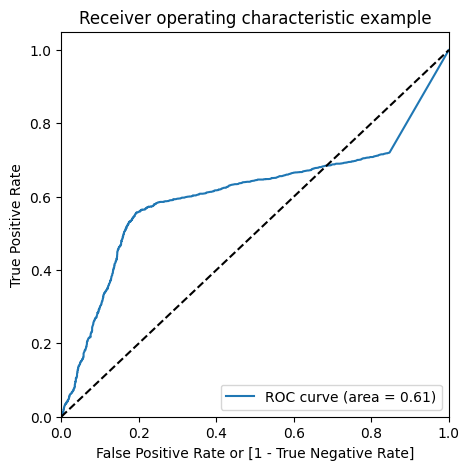

In [218]:
# Calling the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The ROC AUC is 0.86, which is quite good, indicating we have a strong model. Let’s now check the sensitivity–specificity tradeoff to determine the optimal cutoff point.

In [219]:
# Let's create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.354503,0,1,1,1,1,0,0,0,0,0,0
1,0,0.386693,0,1,1,1,1,0,0,0,0,0,0
2,1,0.357405,0,1,1,1,1,0,0,0,0,0,0
3,1,0.337067,0,1,1,1,1,0,0,0,0,0,0
4,1,0.337067,0,1,1,1,1,0,0,0,0,0,0


In [220]:
# Creating a DataFrame to view the accuracy, sensitivity, and specificity values at different probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.481731  1.000000  0.000000
0.2   0.2  0.481731  1.000000  0.000000
0.3   0.3  0.481731  1.000000  0.000000
0.4   0.4  0.587312  0.634714  0.543253
0.5   0.5  0.683927  0.546766  0.811419
0.6   0.6  0.650527  0.427641  0.857699
0.7   0.7  0.584398  0.212192  0.930363
0.8   0.8  0.526788  0.025593  0.992647
0.9   0.9  0.518269  0.000000  1.000000


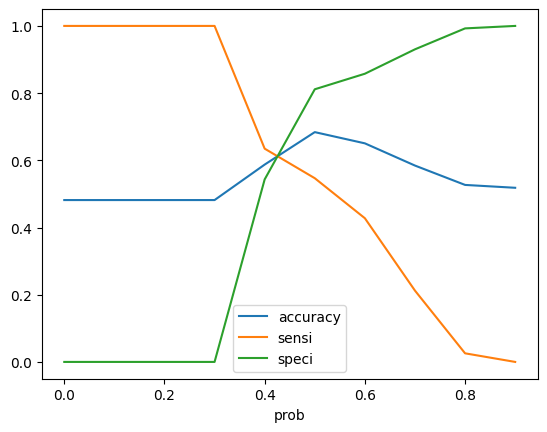

In [221]:
# Plotting

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As we can see, around 0.42 we get the optimal balance of the three metrics, so let’s set 0.42 as our cutoff.

In [222]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.354503,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.386693,0,1,1,1,1,0,0,0,0,0,0,0
2,1,0.357405,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.337067,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.337067,0,1,1,1,1,0,0,0,0,0,0,0


In [223]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.623851154449675

In [224]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1476,  836],
       [ 842, 1307]])

In [225]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [226]:
# Calculating Sensitivity

TP/(TP+FN)

0.608189855746859

In [227]:
# Calculating Specificity

TN/(TN+FP)

0.6384083044982699

This cutoff point looks good to go!

## Step 4: Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [228]:
# Scale the test set as well using only transform.

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [229]:
# Select the same columns from X_train for X_test as well.

X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,0.000000,0.000000,True,False,True,False,False,False,True,False,False,False,True,False,False
6122,0.027888,0.029049,False,False,False,False,False,False,False,False,False,True,False,False,False
9202,0.015936,0.416813,False,False,False,False,False,False,True,False,False,True,False,False,False
6570,0.011952,0.378961,False,False,False,False,True,False,True,False,False,True,False,False,False
2668,0.031873,0.395246,False,False,False,False,False,False,True,False,False,True,False,False,False


In [230]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [231]:
# Check X_test_sm

X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,1.0,0.000000,0.000000,True,False,True,False,False,False,True,False,False,False,True,False,False
6122,1.0,0.027888,0.029049,False,False,False,False,False,False,False,False,False,True,False,False,False
9202,1.0,0.015936,0.416813,False,False,False,False,False,False,True,False,False,True,False,False,False
6570,1.0,0.011952,0.378961,False,False,False,False,True,False,True,False,False,True,False,False,False
2668,1.0,0.031873,0.395246,False,False,False,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,1.0,0.011952,0.027289,False,False,False,False,False,False,True,False,False,True,False,False,False
6583,1.0,0.011952,0.152289,False,False,False,False,False,False,True,False,False,True,False,False,False
5531,1.0,0.055777,0.702025,False,False,False,False,False,False,False,False,False,True,False,False,False
3056,1.0,0.011952,0.417694,False,False,False,False,True,False,True,False,False,True,False,False,False


In [232]:
# Droping the required columns from X_test as well

X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife', 'What is your current occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation'], axis =1, inplace = True)

In [233]:
print("X_train shape before adding constant:", X_train.shape)
print("X_test shape before adding constant:", X_test.shape)


X_train shape before adding constant: (4461, 1)
X_test shape before adding constant: (1912, 11)


In [234]:
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

print("X_train_const shape:", X_train_const.shape)
print("X_test_const shape:", X_test_const.shape)


X_train_const shape: (4461, 2)
X_test_const shape: (1912, 12)


In [235]:
print(res.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4459
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2876.3
Date:                Tue, 04 Feb 2025   Deviance:                       5752.7
Time:                        10:54:18   Pearson chi2:                 4.49e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.09100
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [236]:
X_train_const = X_train[['Total Time Spent on Website']]
X_test_const = X_test[['Total Time Spent on Website']]

X_train_const = sm.add_constant(X_train_const)
X_test_const = sm.add_constant(X_test_const)

print(X_train_const.shape)
print(X_test_const.shape)


(4461, 2)
(1912, 2)


In [237]:
y_test_pred = res.predict(X_test_const)
print(y_test_pred[:10])

4771    0.337067
6122    0.354240
9202    0.601857
6570    0.577924
2668    0.588273
4233    0.337067
3368    0.762573
9091    0.595499
5972    0.355294
3631    0.656024
dtype: float64


In [238]:
y_test_pred[:10]

,0
4771,0.337067
6122,0.354240
9202,0.601857
6570,0.577924
2668,0.588273
4233,0.337067
3368,0.762573
9091,0.595499
5972,0.355294
3631,0.656024


In [239]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [240]:
# Let's see the head

y_pred_1.head()

,0
4771,0.337067
6122,0.354240
9202,0.601857
6570,0.577924
2668,0.588273


In [241]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [242]:
# Removing index for both dataframes to append them side by side

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [243]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [244]:
# Checking 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.337067
1,0,0.354240
2,0,0.601857
3,1,0.577924
4,1,0.588273


In [245]:
# Renaming the column

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [246]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.337067
1,0,0.354240
2,0,0.601857
3,1,0.577924
4,1,0.588273


In [247]:
# Making predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [248]:
# Checking y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.337067,0
1,0,0.354240,0
2,0,0.601857,1
3,1,0.577924,1
4,1,0.588273,1


In [249]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.6239539748953975

In [250]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[627, 369],
       [350, 566]])

In [251]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [252]:
# Calculating sensitivity
TP / float(TP+FN)

0.6179039301310044

In [253]:
# Calculating specificity
TN / float(TN+FP)

0.6295180722891566

## Precision-Recall View

Let's now also build the training model using the precision-recall view

In [254]:
#Looking at the confusion matrix again

In [255]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1876,  436],
       [ 974, 1175]])

##### Precision
TP / TP + FP

In [256]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7293606455617628

##### Recall
TP / TP + FN

In [257]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5467659376454165

### Precision and recall tradeoff

In [258]:
from sklearn.metrics import precision_recall_curve

In [259]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 4456    0
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [260]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

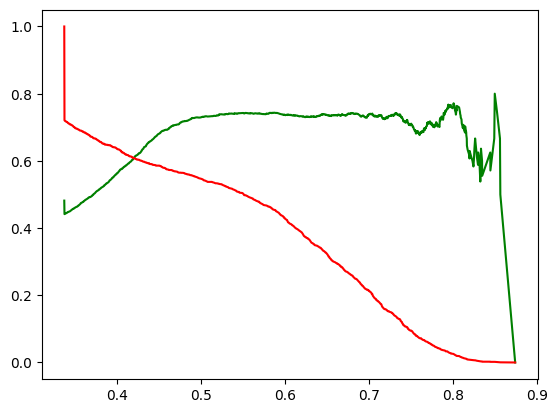

In [261]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [270]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.354503,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.386693,0,1,1,1,1,0,0,0,0,0,0,0
2,1,0.357405,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.337067,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.337067,0,1,1,1,1,0,0,0,0,0,0,0


In [271]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.6559067473660615

In [272]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1657,  655],
       [ 880, 1269]])

In [265]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [266]:
# Calculating Precision

TP/(TP+FP)

0.6595634095634095

In [267]:
# Calculating Recall

TP/(TP+FN)

0.5905072126570498

This cutoff point seems good to go!